# Decorator

[TEL](https://t.me/scientific_programming)

In Python, a decorator is a way to modify the behavior of a function or a class without changing its source code. Decorators are implemented as functions that take a function or a class as an argument and return a new function or class. The new function or class can be used in place of the original one, with the added behavior provided by the decorator.

In [1]:
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Time taken: {end_time - start_time:.2f} seconds")
        return result
    return wrapper

@timer
def my_function():
    # do some work here
    time.sleep(1)

my_function() # this will print "Time taken: 1.00 seconds"


Time taken: 1.00 seconds


In [2]:
def log_function(func):
    def wrapper(*args, **kwargs):
        print(f"Calling function {func.__name__} with args {args} and kwargs {kwargs}")
        result = func(*args, **kwargs)
        print(f"Function {func.__name__} returned {result}")
        return result
    return wrapper

@log_function
def my_function(x, y):
    return x + y

my_function(1, 2)  # Output: Calling function my_function with args (1, 2) and kwargs {}; Function my_function returned 3


Calling function my_function with args (1, 2) and kwargs {}
Function my_function returned 3


3

Memoization decorator

This decorator can be used to cache the return values of any function. It checks whether the function has already been called with the same arguments, and if so, returns the cached value instead of calling the function again.

In [6]:
def memoize(func):
    cache = {}
    def wrapper(*args):
        if args in cache:
            return cache[args]
        else:
            result = func(*args)
            cache[args] = result
            return result
    return wrapper

@memoize
def fib(n):
    if n < 2:
        return n
    else:
        return fib(n-1) + fib(n-2)

fib(10)  # Output: 55 (the result is cached after the first call, so subsequent calls are much faster)


55

In [7]:
fib(11)

89

Plotting decorator for visualizing data 

In scientific computing, it is often necessary to visualize data to gain insights into the underlying patterns and relationships. A plotting decorator can be used to automatically generate plots of the data produced by a function. Here is an example of a plotting decorator:


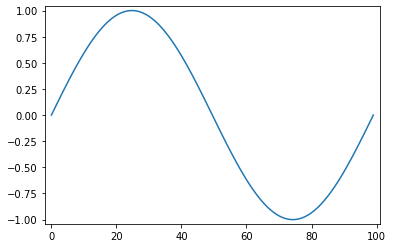

In [11]:
import matplotlib.pyplot as plt

def plot(func):
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        plt.plot(result)
        plt.margins(0.02)
        plt.show()
        return result
    return wrapper

@plot
def sin_wave():
    import numpy as np
    x = np.linspace(0, 2*np.pi, 100)
    y = np.sin(x)
    return y

y = sin_wave()

In [19]:
t.shape, y.shape, y[0].shape

((7,), (1, 7), (7,))

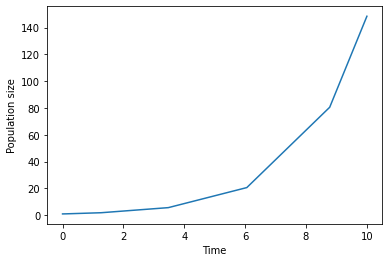

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def ode_solver(func):
    def wrapper(t_span, y0, args=(), **kwargs):
        sol = solve_ivp(func, t_span, y0, args=args, **kwargs)
        return sol.t, sol.y
    return wrapper

@ode_solver
def exponential_growth(t, y, k):
    return k*y

t_span = [0, 10]
y0 = [1]
k = 0.5

t, y = exponential_growth(t_span, y0, args=(k,), method='RK45')

plt.plot(t, y[0])
plt.xlabel('Time')
plt.ylabel('Population size')
plt.show()
